In [1]:
# Install PySpark and required libraries
!pip install pyspark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [2]:
# Import necessary libraries
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, count, max, min
import matplotlib.pyplot as plt

In [3]:
# Initialize Spark Session
spark = SparkSession.builder \
    .appName("Airline Delay Analysis") \
    .config("spark.executor.memory", "4g") \
    .config("spark.driver.memory", "2g") \
    .getOrCreate()

# Check Spark version
spark.version

'3.5.4'

In [5]:
# Load the dataset (adjust the file path if needed)
file_path = '/content/Airlines.csv'
df = spark.read.csv(file_path, header=True, inferSchema=True)

In [6]:
# Display the schema of the DataFrame
df.printSchema()

# Display the first few rows of the DataFrame
df.show(5)

root
 |-- id: integer (nullable = true)
 |-- Airline: string (nullable = true)
 |-- Flight: integer (nullable = true)
 |-- AirportFrom: string (nullable = true)
 |-- AirportTo: string (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- Time: integer (nullable = true)
 |-- Length: integer (nullable = true)
 |-- Delay: integer (nullable = true)

+---+-------+------+-----------+---------+---------+----+------+-----+
| id|Airline|Flight|AirportFrom|AirportTo|DayOfWeek|Time|Length|Delay|
+---+-------+------+-----------+---------+---------+----+------+-----+
|  1|     CO|   269|        SFO|      IAH|        3|  15|   205|    1|
|  2|     US|  1558|        PHX|      CLT|        3|  15|   222|    1|
|  3|     AA|  2400|        LAX|      DFW|        3|  20|   165|    1|
|  4|     AA|  2466|        SFO|      DFW|        3|  20|   195|    1|
|  5|     AS|   108|        ANC|      SEA|        3|  30|   202|    0|
+---+-------+------+-----------+---------+---------+----+------+-----+
on

In [7]:
# Drop rows with missing values in relevant columns
df = df.na.drop(subset=["Airline", "AirportFrom", "AirportTo", "Delay"])

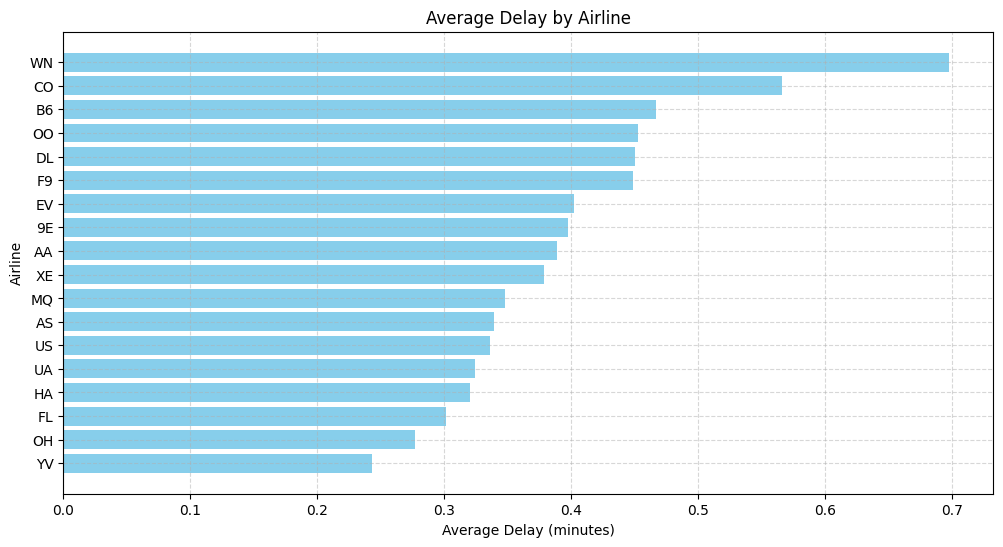

In [8]:
# Calculate Average Delay by Airline
avg_delay_df = df.groupBy("Airline").agg(avg("Delay").alias("Average_Delay")).orderBy("Average_Delay")

# Convert to Pandas DataFrame
avg_delay_pd = avg_delay_df.toPandas()

# Plot the graph
plt.figure(figsize=(12, 6))
plt.barh(avg_delay_pd['Airline'], avg_delay_pd['Average_Delay'], color='skyblue')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Airline')
plt.title('Average Delay by Airline')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

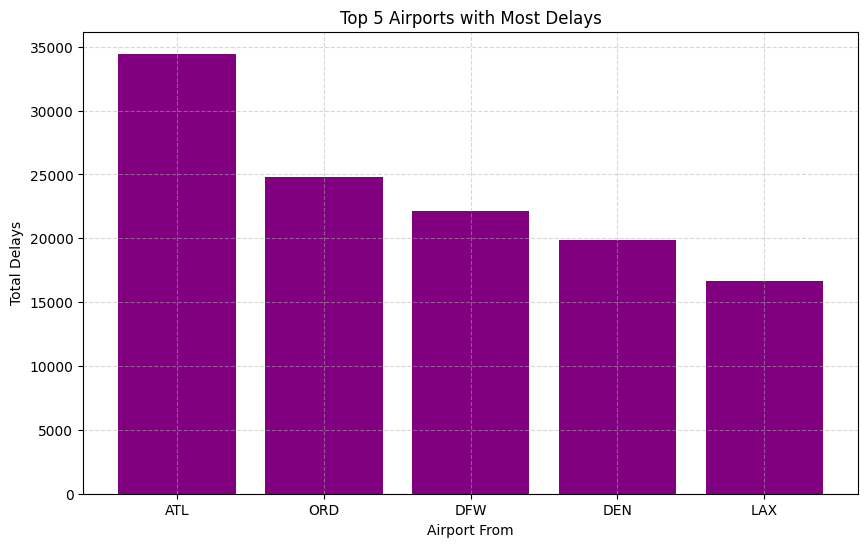

In [9]:
# Calculate Top 5 Airports with Most Delays
top_airports_df = df.groupBy("AirportFrom").agg(count("Delay").alias("Total_Delays")) \
                    .orderBy(col("Total_Delays").desc()).limit(5)

# Convert to Pandas DataFrame
top_airports_pd = top_airports_df.toPandas()

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(top_airports_pd['AirportFrom'], top_airports_pd['Total_Delays'], color='purple')
plt.xlabel('Airport From')
plt.ylabel('Total Delays')
plt.title('Top 5 Airports with Most Delays')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

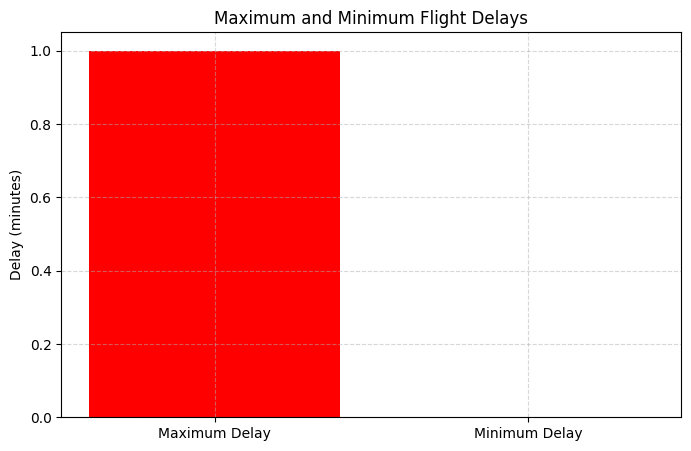

In [10]:
# Maximum delay
max_delay = df.select(max("Delay").alias("Maximum_Delay")).collect()[0]["Maximum_Delay"]

# Minimum delay
min_delay = df.select(min("Delay").alias("Minimum_Delay")).collect()[0]["Minimum_Delay"]

# Data for plotting
delays = ['Maximum Delay', 'Minimum Delay']
values = [max_delay, min_delay]

# Plot the graph
plt.figure(figsize=(8, 5))
plt.bar(delays, values, color=['red', 'green'])
plt.ylabel('Delay (minutes)')
plt.title('Maximum and Minimum Flight Delays')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

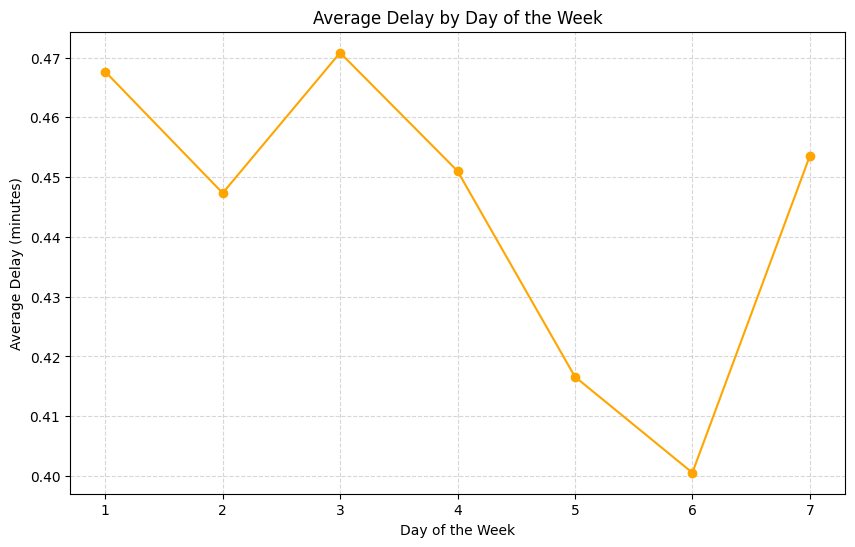

In [11]:
# Calculate Average Delay by Day of the Week
delay_by_day_df = df.groupBy("DayOfWeek").agg(avg("Delay").alias("Average_Delay")).orderBy("DayOfWeek")

# Convert to Pandas DataFrame
delay_by_day_pd = delay_by_day_df.toPandas()

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(delay_by_day_pd['DayOfWeek'], delay_by_day_pd['Average_Delay'], marker='o', linestyle='-', color='orange')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delay by Day of the Week')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()